# Полиномиальная аппроксимация

Для заданного набора данных из ЛР_ЕМПИ№3 спрогнозировать значение Xpredict, на основании полиномиальных моделей всех возможных порядков.

---

 Оценить полученные модели на основании соответствующих величин RSS.

---

 Вывести на графиках узлы аппроксимации и кривые, описывающие каждую из моделей

---

Сделать вывод о переученности/недоученности моделей.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')  
plt.rcParams['figure.figsize'] = (15, 5)  


Используем из пакета  *numpy* функцию [polyfit](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html) для нахождения коэффициентов аппроксимирующих полиномов нужного порядка. Например, коэффициенты полинома первого порядка (см. пример из ЛР_ЕМПИ№3):


In [16]:
x=[-3, -1, 0, 1, 2, 3, 4]
y=[2.9, 1.0, -0.2, -1.5, -0.4, 0.5, 2.0]

model_1 = np.polyfit(x, y, 1)
print(model_1)

model_2 = np.polyfit(x, y, 2)
print(model_2)

model_3 = np.polyfit(x, y, 3)
print(model_3)

model_4 = np.polyfit(x, y, 4)
print(model_4)

model_5 = np.polyfit(x, y, 5)
print(model_5)


[-0.17745902  0.76639344]
[ 0.25579496 -0.45422078 -0.45806769]
[ 0.03566897  0.20450239 -0.78172681 -0.25112869]
[-0.02240802  0.09056474  0.44702514 -1.19497362 -0.45170425]
[-3.14171123e-04 -2.12607357e-02  9.36588478e-02  4.36254254e-01
 -1.19650462e+00 -4.44733431e-01]


Предскажем  значение Ypredict:
воспользуемся функцией [poly1d](https://docs.scipy.org/doc/numpy/reference/generated/numpy.poly1d.html#numpy.poly1d) для формирования полинома с рассчитанными на предыдущем шаге коэффициентами:


In [13]:
p_1 = np.poly1d(model_1)
print(p_1)


 
-0.1775 x + 0.7664


а теперь подставим в качестве Xpredict=6:


In [14]:
Xpredict=6
print(p_1(Xpredict))

-0.2983606557377054


Расчитаем RSS модели

In [17]:
RSS = 0
for i in range(len(x)):
  RSS += pow(model_1[0] * x[i] + model_1[1] - y[i] , 2)
print('RSS полинома 1-го порядка:',RSS)
RSS = 0
for i in range(len(x)):
  RSS += pow(model_2[0] * x[i] + model_2[1] - y[i] , 2)
print('RSS полинома 2-го порядка:',RSS)
RSS = 0
for i in range(len(x)):
  RSS += pow(model_3[0] * x[i] + model_3[1] - y[i] , 2)
print('RSS полинома 3-го порядка:',RSS)
RSS = 0
for i in range(len(x)):
  RSS += pow(model_4[0] * x[i] + model_4[1] - y[i] , 2)
print('RSS полинома 4-го порядка:',RSS)
RSS = 0
for i in range(len(x)):
  RSS += pow(model_5[0] * x[i] + model_5[1] - y[i] , 2)
print('RSS полинома 5-го порядка:',RSS)

RSS полинома 1-го порядка: 12.370860655737706
RSS полинома 2-го порядка: 23.962482997359636
RSS полинома 3-го порядка: 14.960796620890706
RSS полинома 4-го порядка: 15.27224922315177
RSS полинома 5-го порядка: 16.29451970582609


Глядя на значение RSS, если его не с чем сравнить, нельзя сказать - это много или мало, хорошо или плохо. RSS возможно интерпретировать лишь тогда, когда есть RSS другой модели, поэтому, пока что, для нас этот показатель неинформативен

Оценим качество модели визуально, расширив интервал видимости на графике (решите самостоятельно насколько сильно нужно расширить интервал)

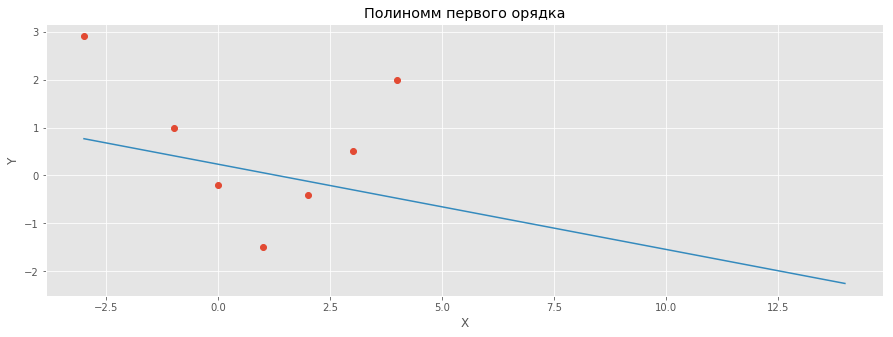

In [0]:
# У графика должно быть название, оси подписаны
# Ваш код

n = 15

Y = [0 for i in range(n + 3)]
X = np.arange(-3, n, 1)
for i in range(len(Y)):
  Y[i] = p_1(i)

fig, ax = plt.subplots()
ax.set_title('Полиномм первого орядка')
ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.plot(x, y, 'o')
ax.plot(X, Y)


Видим, что модель абсолютно не улавливает зависимости данных, отвергаем линейную модель

Постройте модели всех возможных порядков для своих данных, оцените их качество визуально и на основании RSS 

In [0]:
#Ваш код

In [0]:
model_2 = np.polyfit(x, y, 2)
print(model_2)

[ 0.25579496 -0.45422078 -0.45806769]


In [0]:
p_2 = np.poly1d(model_2)
print(p_2)

        2
0.2558 x - 0.4542 x - 0.4581


Text(0.5, 1.0, 'Полиномм второго порядка')

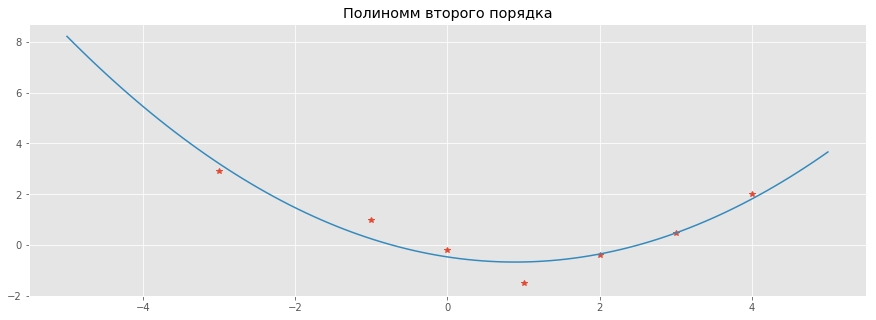

In [0]:
x_new=np.linspace(-5,5,100)
plt.plot(x,y,'*', x_new, p_2(x_new))
plt.title('Полиномм второго порядка')

In [0]:
RSS2 = 0
for i in range(len(x)):
  Yy = p_2(x[i])
  RSS2 = RSS2 + pow(Yy - y[i], 2)
print(RSS2)

1.4685438803620623


(-10, 10)

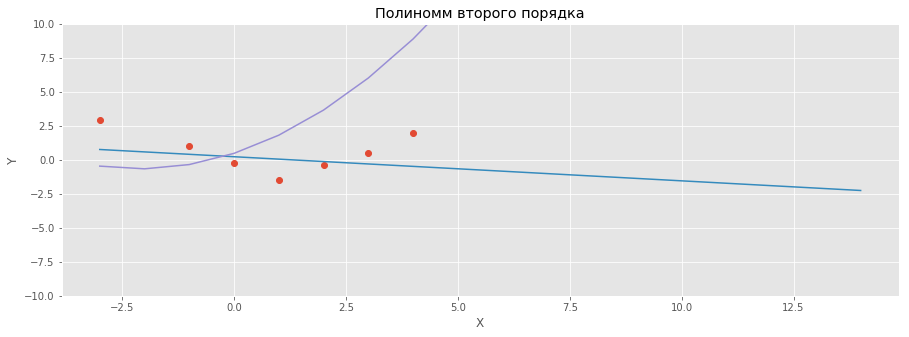

In [0]:
Y1 = [0 for i in range(n + 3)]
X1 = np.arange(-3, n, 1)
for i in range(len(Y)):
  Y1[i] = p_2(i)

fig, ax = plt.subplots()
ax.set_title('Полиномм второго порядка')
ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.plot(x, y, 'o')
ax.plot(X, Y)
ax.plot(X1, Y1)
ax.set_ylim(-10, 10)

In [0]:
model_3 = np.polyfit(x, y, 3)
p_3 = np.poly1d(model_3)

model_4 = np.polyfit(x, y, 4)
p_4 = np.poly1d(model_4)

model_5 = np.polyfit(x, y, 5)
p_5 = np.poly1d(model_5)

In [0]:
RSS3 = 0
for i in range(len(x)):
  Yy = p_3(x[i])
  RSS3 = RSS3 + pow(Yy - y[i], 2)
print(RSS3)

RSS4 = 0
for i in range(len(x)):
  Yy = p_4(x[i])
  RSS4 = RSS4 + pow(Yy - y[i], 2)
print(RSS4)

RSS5 = 0
for i in range(len(x)):
  Yy = p_5(x[i])
  RSS5 = RSS5 + pow(Yy - y[i], 2)
print(RSS5)


0.8121758115010712
0.30185786991642155
0.30172135796467353


In [0]:
X1 = np.arange(-5, 10, 0.1)

(-10, 20)

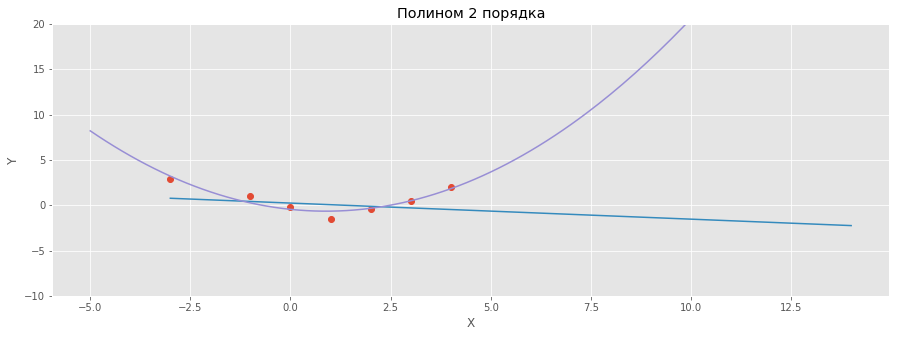

In [0]:
fig, ax = plt.subplots()
ax.set_title('Полином 2 порядка')
ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.plot(x, y, 'o')
ax.plot(X, Y)
ax.plot(X1, p_2(X1))
ax.set_ylim(-10, 20)

(-20, 10)

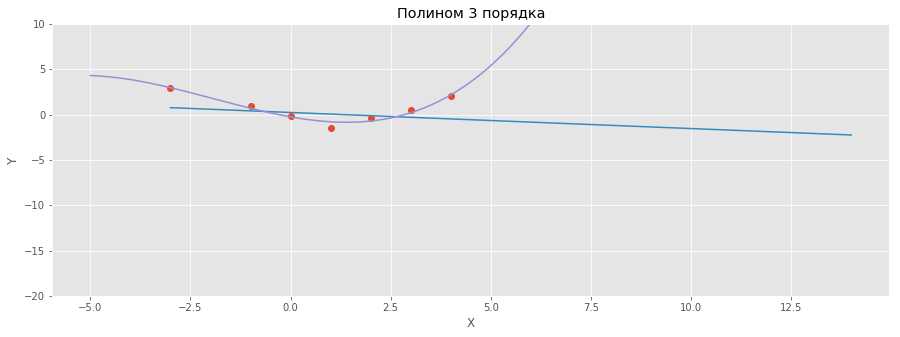

In [0]:
fig, ax = plt.subplots()
ax.set_title('Полином 3 порядка')
ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.plot(x, y, 'o')
ax.plot(X, Y)
ax.plot(X1, p_3(X1))
ax.set_ylim(-20, 10)

(-10, 20)

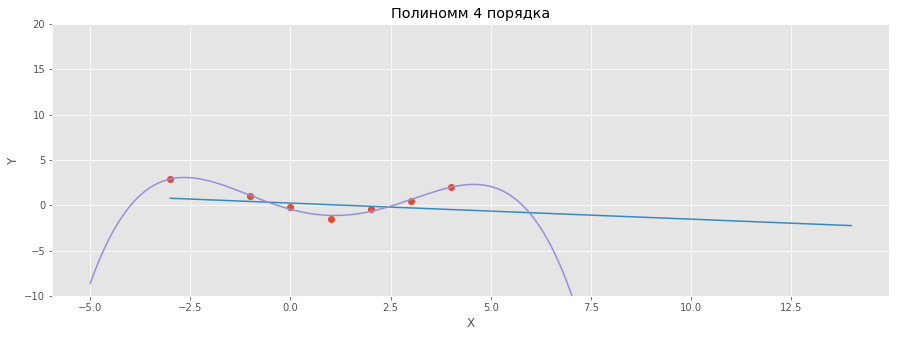

In [0]:
fig, ax = plt.subplots()
ax.set_title('Полиномм 4 порядка')
ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.plot(x, y, 'o')
ax.plot(X, Y)
ax.plot(X1, p_4(X1))
ax.set_ylim(-10, 20)

(-10, 20)

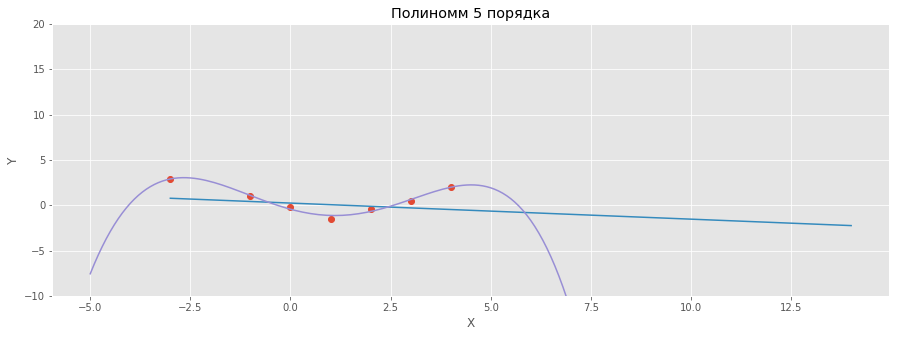

In [0]:
fig, ax = plt.subplots()
ax.set_title('Полиномм 5 порядка')
ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.plot(x, y, 'o')
ax.plot(X, Y)
ax.plot(X1, p_5(X1))
ax.set_ylim(-10, 20)

In [0]:
x_new=np.linspace(-5,10,100)

(-15, 15)

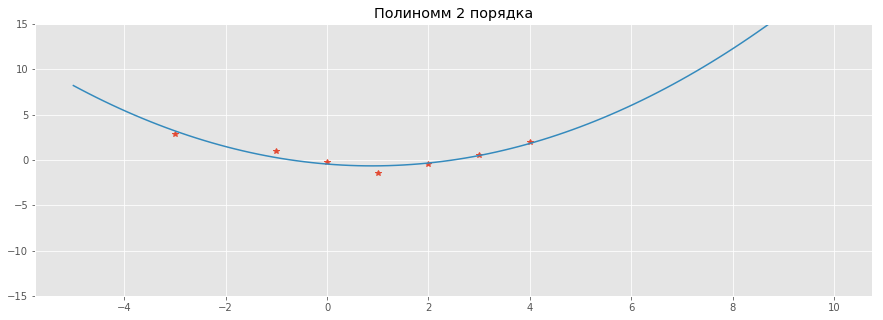

In [0]:
plt.plot(x,y,'*', x_new, p_2(x_new))
plt.title('Полиномм 2 порядка')
plt.ylim(-15, 15)

(-15, 15)

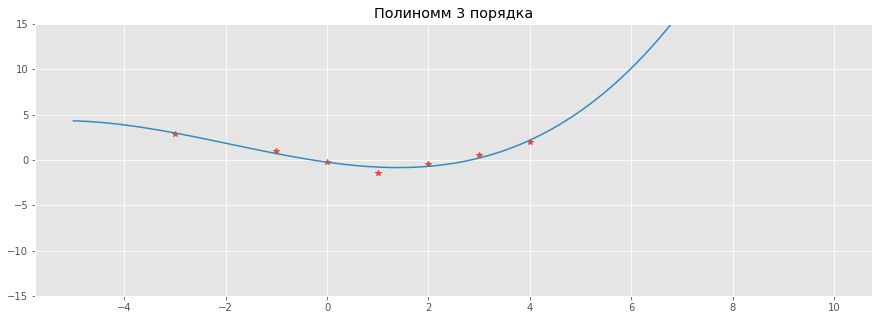

In [0]:
plt.plot(x,y,'*', x_new, p_3(x_new))
plt.title('Полиномм 3 порядка')
plt.ylim(-15, 15)

(-15, 15)

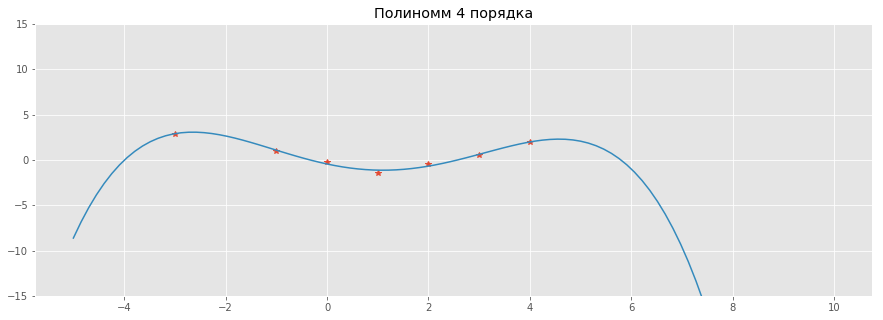

In [0]:
plt.plot(x,y,'*', x_new, p_4(x_new))
plt.title('Полиномм 4 порядка')
plt.ylim(-15, 15)

(-15, 15)

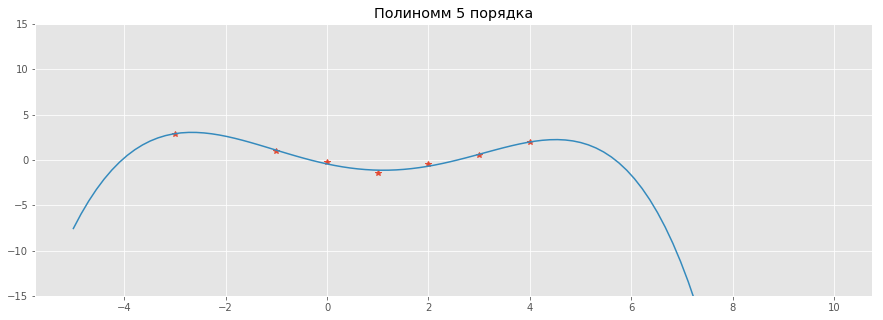

In [0]:
plt.plot(x,y,'*', x_new, p_5(x_new))
plt.title('Полиномм 5 порядка')
plt.ylim(-15, 15)